In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt




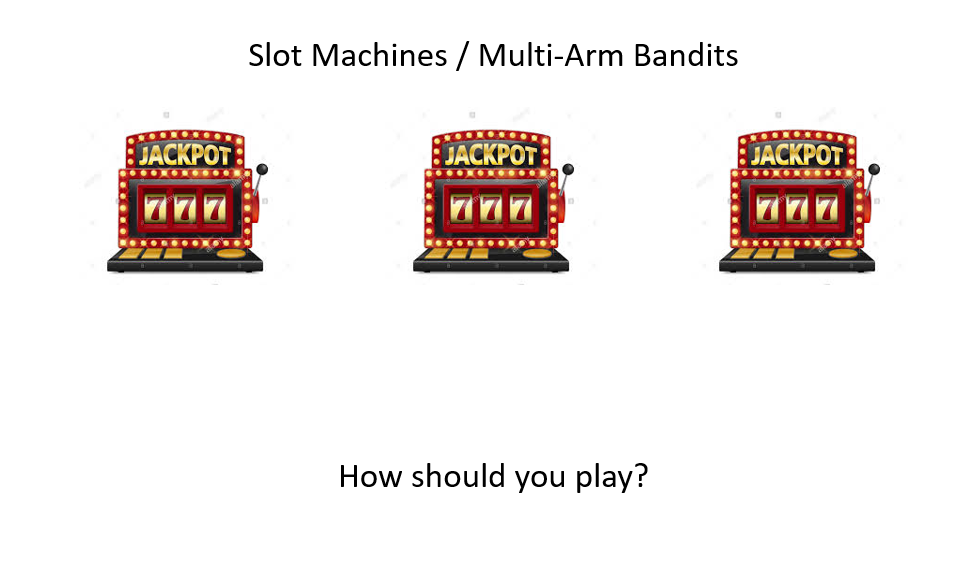

In [143]:
machine1 = np.random.normal(0.1,0.5,1000)
machine2 = np.random.normal(0.5,0.5,1000)
machine3 = np.random.normal(0.4,0.5,1000)


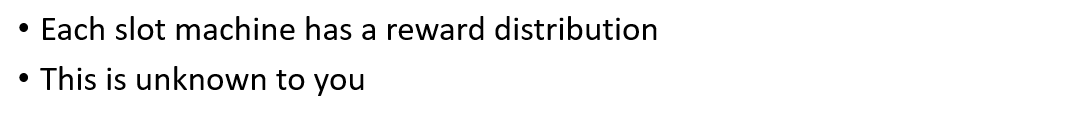

In [144]:
base1 = alt.Chart(pd.DataFrame({"Machine 1":machine1}),title="Machine 1")
dist1 = base1.transform_density(
    'Machine 1',
    as_=['Machine 1', 'density'],
).mark_area().encode(
    x=alt.X("Machine 1:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=200,height=150)
mean1 = base1.mark_rule(color='red').encode(
    x='mean(Machine 1):Q',
    size=alt.value(1)
).properties(width=200,height=150)

annotation1 = base1.mark_text(
    align='left',
    baseline='middle',
    fontSize = 20,
    dx = 7,color='red'
).encode(
    x='mean(Machine 1):Q',
    text='mean(Machine 1):Q'
)



base2 = alt.Chart(pd.DataFrame({"Machine 2":machine2}),title="Machine 2")
dist2 = base2.transform_density(
    'Machine 2',
    as_=['Machine 2', 'density'],
).mark_area().encode(
    x=alt.X("Machine 2:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=200,height=150)
mean2 = base2.mark_rule(color='red').encode(
    x='mean(Machine 2):Q',
    size=alt.value(1)
).properties(width=200,height=150)

annotation2 = base2.mark_text(
    align='left',
    baseline='middle',
    fontSize = 20,
    dx = 7,color='red'
).encode(
    x='mean(Machine 2):Q',
    text='mean(Machine 2):Q'
)



base3 = alt.Chart(pd.DataFrame({"Machine 3":machine3}),title="Machine 3")
dist3 = base3.transform_density(
    'Machine 3',
    as_=['Machine 3', 'density'],
).mark_area().encode(
    x=alt.X("Machine 3:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=200,height=150)
mean3 = base3.mark_rule(color='red').encode(
    x='mean(Machine 3):Q',
    size=alt.value(1)
).properties(width=200,height=150)

annotation3 = base3.mark_text(
    align='left',
    baseline='middle',
    fontSize = 20,
    dx = 7,color='red'
).encode(
    x='mean(Machine 3):Q',
    text='mean(Machine 3):Q'
)

(dist1+mean1+annotation1)|(dist2+mean2+annotation2)|(dist3+mean3+annotation3)


alt.HConcatChart(...)

In [146]:
(dist1+mean1+annotation1)&(dist2+mean2+annotation2)&(dist3+mean3+annotation3)

alt.VConcatChart(...)

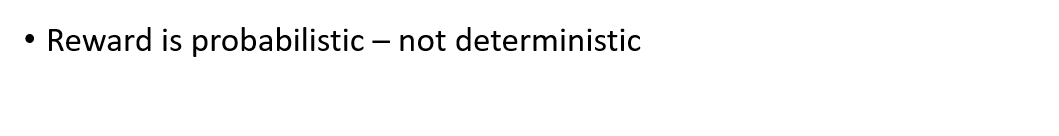

In [149]:
m1_sample= np.random.choice(machine1)
print(m1_sample)

-0.1455418765099136


In [150]:
m2_sample= np.random.choice(machine2)
print(m2_sample)

0.2906386198966371


In [151]:
m3_sample= np.random.choice(machine3)
print(m3_sample)

0.39715834676556455


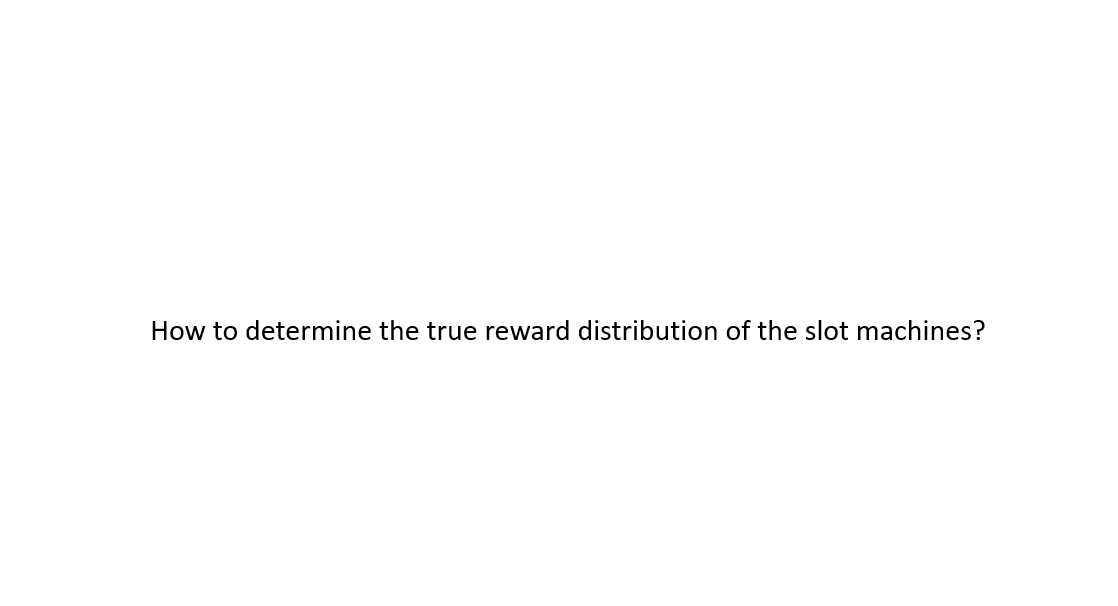

### Answer 1: infinite trials

In [152]:
trials=5000
machine1_samples = np.random.choice(machine1,trials,replace=True)
machine2_samples = np.random.choice(machine2,trials,replace=True)
machine3_samples = np.random.choice(machine3,trials,replace=True)

base1 = alt.Chart(pd.DataFrame({"Machine 1":machine1_samples}),title="Machine 1 - infinite sample")
dist1 = base1.transform_density(
    'Machine 1',
    as_=['Machine 1', 'density'],
).mark_area().encode(
    x=alt.X("Machine 1:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=200,height=150)
mean1 = base1.mark_rule(color='red').encode(
    x='mean(Machine 1):Q',
    size=alt.value(1)
).properties(width=200,height=150)

annotation1 = base1.mark_text(
    align='left',
    baseline='middle',
    fontSize = 20,
    dx = 7,color='red'
).encode(
    x='mean(Machine 1):Q',
    text='mean(Machine 1):Q'
)



base2 = alt.Chart(pd.DataFrame({"Machine 2":machine2_samples}),title="Machine 2 - infinite sample")
dist2 = base2.transform_density(
    'Machine 2',
    as_=['Machine 2', 'density'],
).mark_area().encode(
    x=alt.X("Machine 2:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=200,height=150)
mean2 = base2.mark_rule(color='red').encode(
    x='mean(Machine 2):Q',
    size=alt.value(1)
).properties(width=200,height=150)

annotation2 = base2.mark_text(
    align='left',
    baseline='middle',
    fontSize = 20,
    dx = 7,color='red'
).encode(
    x='mean(Machine 2):Q',
    text='mean(Machine 2):Q'
)



base3 = alt.Chart(pd.DataFrame({"Machine 3":machine3_samples}),title="Machine 3 - infinite sample")
dist3 = base3.transform_density(
    'Machine 3',
    as_=['Machine 3', 'density'],
).mark_area().encode(
    x=alt.X("Machine 3:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=200,height=150)
mean3 = base3.mark_rule(color='red').encode(
    x='mean(Machine 3):Q',
    size=alt.value(1)
).properties(width=200,height=150)

annotation3 = base3.mark_text(
    align='left',
    baseline='middle',
    fontSize = 20,
    dx = 7,color='red'
).encode(
    x='mean(Machine 3):Q',
    text='mean(Machine 3):Q'
)

(dist1+mean1+annotation1)|(dist2+mean2+annotation2)|(dist3+mean3+annotation3)


alt.HConcatChart(...)

### But inefficient 

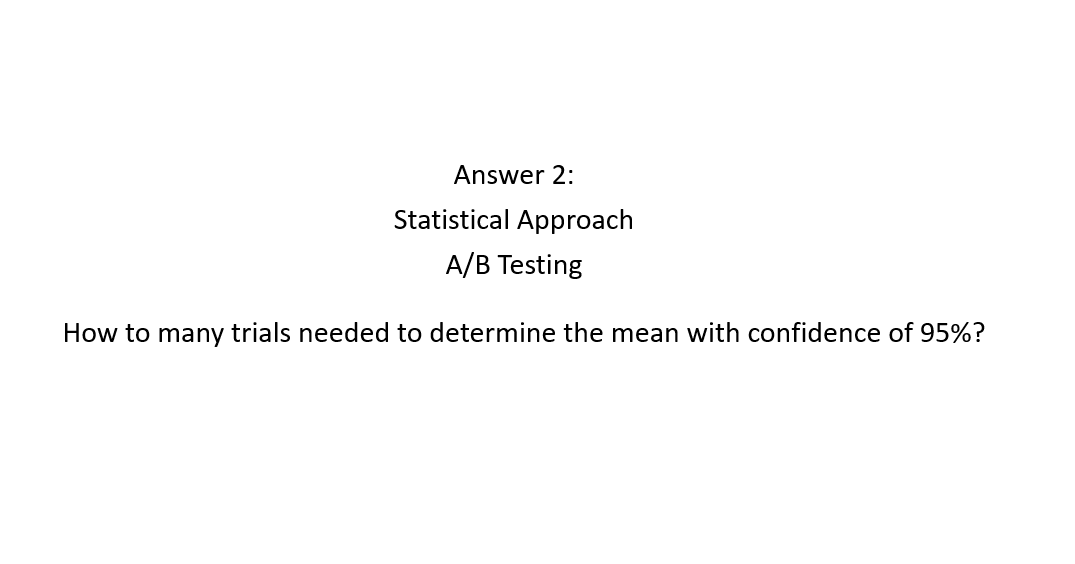

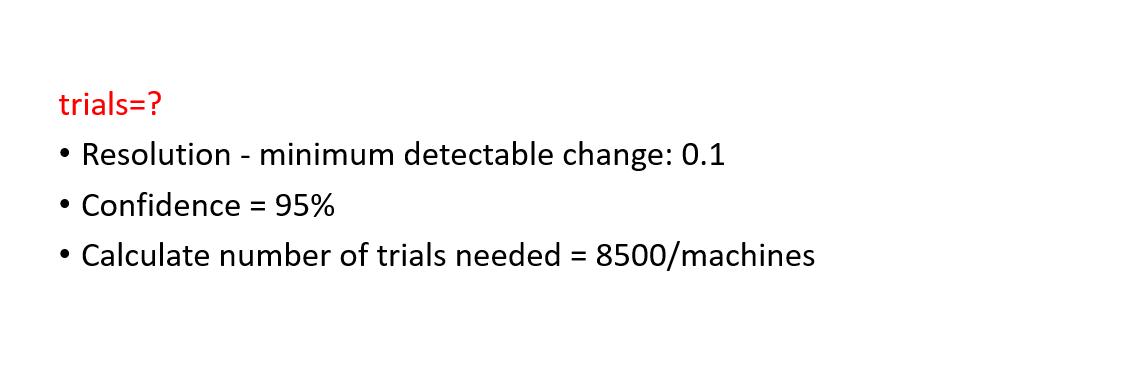

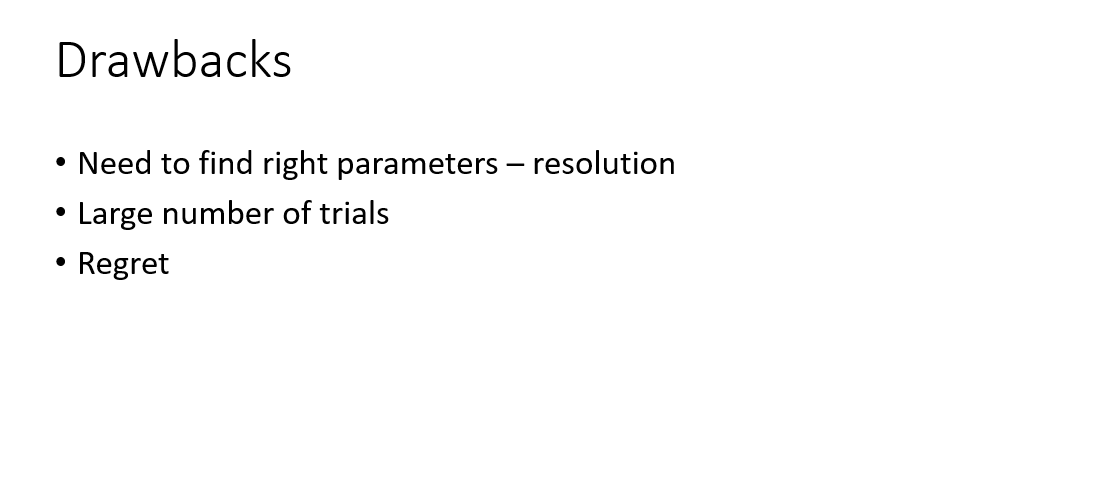

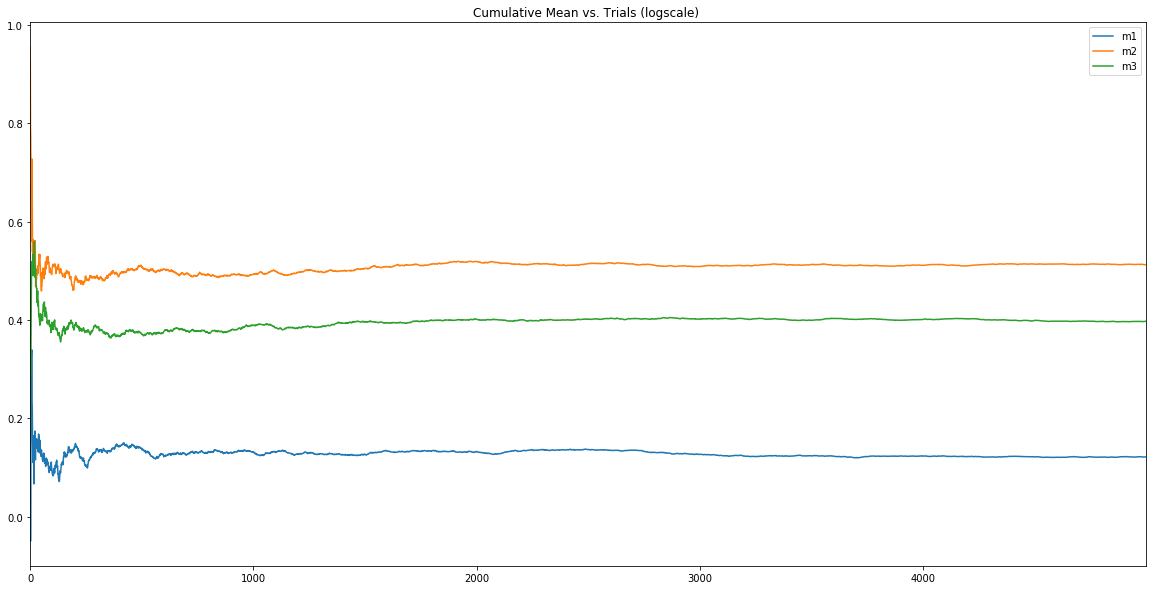

In [153]:
pd.DataFrame({"m1":machine1_samples,
              "m2":machine2_samples,
              "m3":machine3_samples
             }).expanding().mean().plot(figsize=(20,10),title="Cumulative Mean vs. Trials (logscale) ")

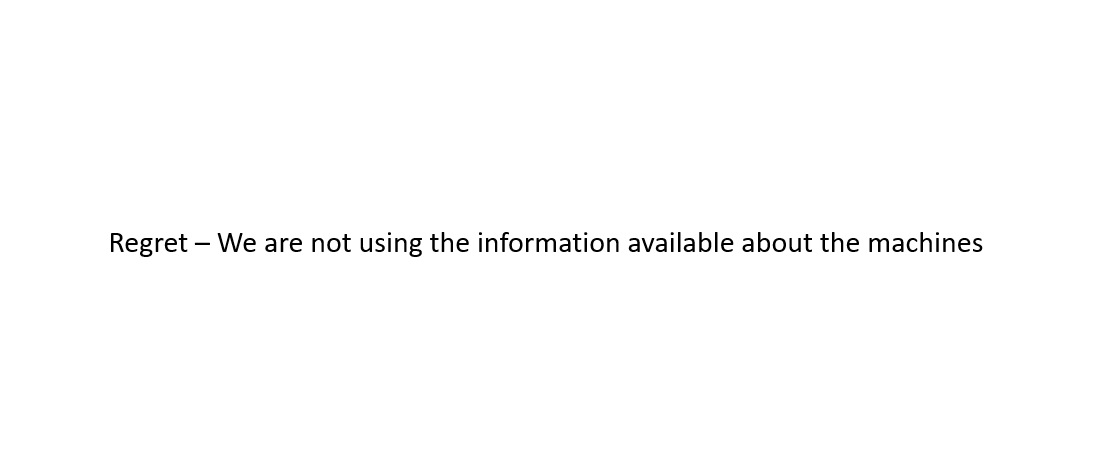

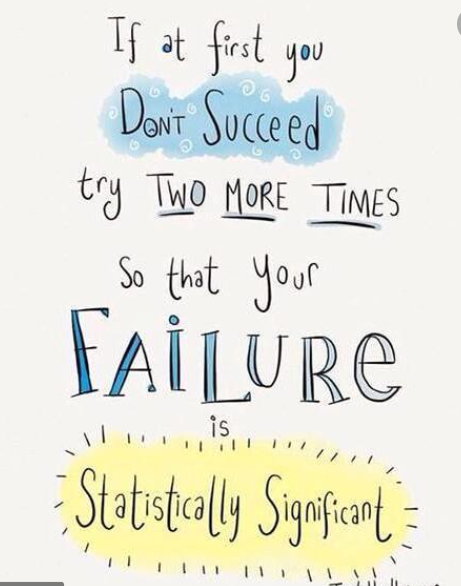

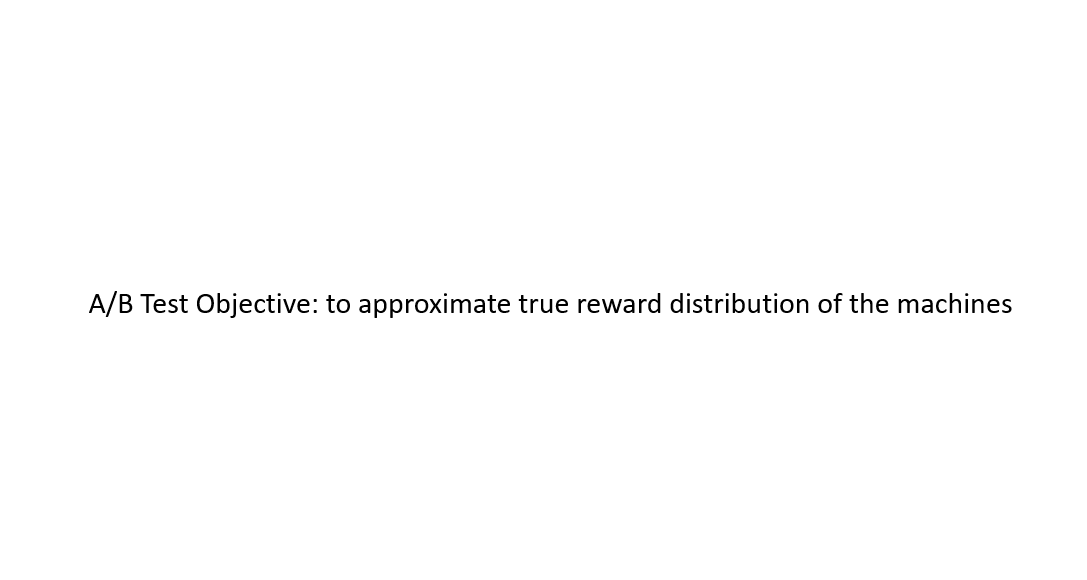

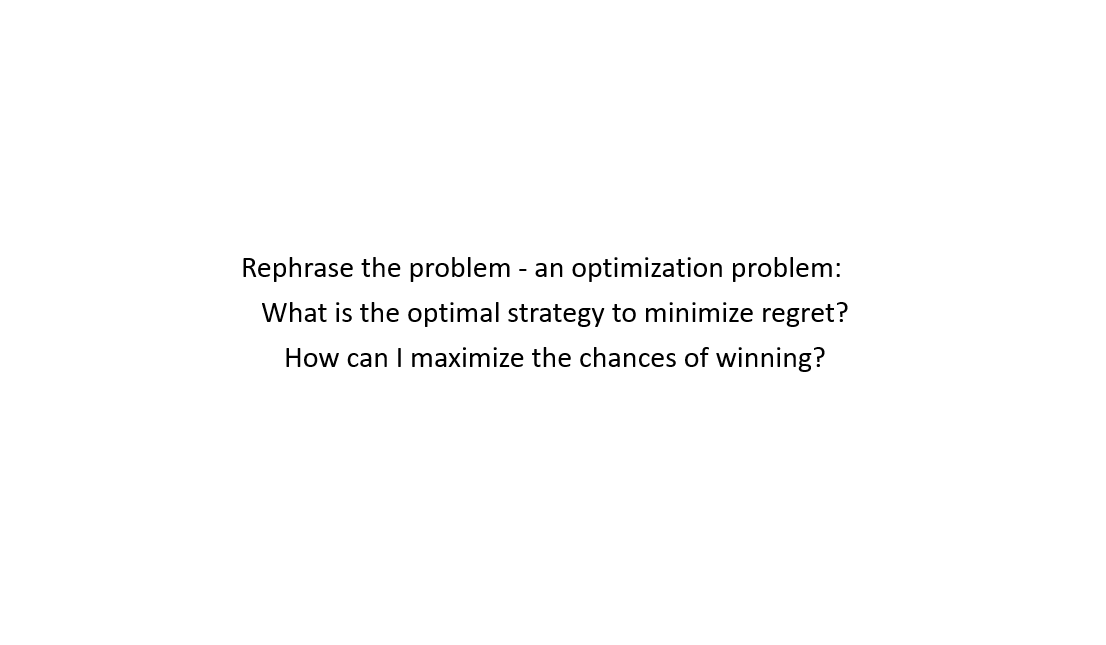

## Multi Arm Bandit Problem    


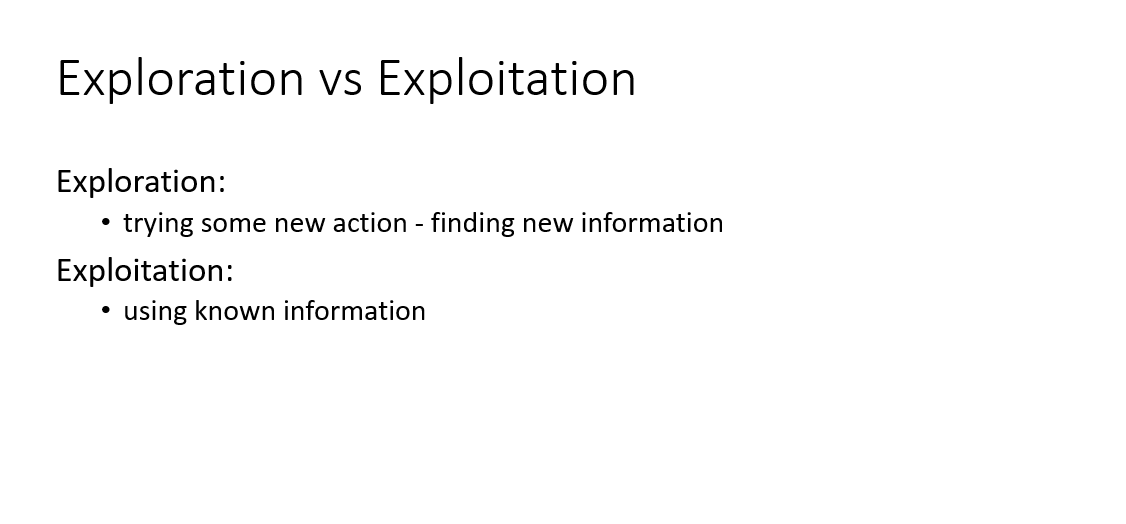

### Compare to AB Test: All explore -> then exploit

## Approach 1: Epsilon greedy strategy:
#### Epsilon = 0.5
 We will explore 50% of the time

In [160]:
games = 10
machine_sample1=[]
machine_sample2=[]
machine_sample3=[]
for game in range(games):
    rand_num = np.random.random()
    if rand_num<0.33:
        machine_sample1.append(np.random.choice(machine1))
    elif rand_num<0.67:
        machine_sample2.append(np.random.choice(machine2))
    else:
        machine_sample3.append(np.random.choice(machine3))
pd.DataFrame({"machine_sample1":machine_sample1})

,machine_sample1
0,-0.586738
1,0.175146
2,0.022101
3,0.174359


In [161]:
pd.DataFrame({"machine_sample2":machine_sample2})

,machine_sample2
0,1.679237
1,1.197703
2,0.583850
3,0.660710


In [162]:
pd.DataFrame({"machine_sample3":machine_sample3})

,machine_sample3
0,0.541940
1,1.140127


In [163]:
m1 = pd.DataFrame({"mean machine_sample1":machine_sample1}).mean().to_frame().T
m2 = pd.DataFrame({"mean machine_sample2":machine_sample2}).mean().to_frame().T
m3 = pd.DataFrame({"mean machine_sample3":machine_sample3}).mean().to_frame().T
m1.merge(m2,right_index=True,left_index=True).merge(m3,right_index=True,left_index=True)

,mean machine_sample1,mean machine_sample2,mean machine_sample3
0,-0.053783,1.030375,0.841034


In [164]:
epsilon = 0.5
trials = 100
output=pd.DataFrame()
for i in range(trials):
    random_num=np.random.random()
    if random_num<epsilon:
        mode="explore"
        output.loc[i,"Mode"]=mode
        choice = np.random.choice([1,2,3])
        output.loc[i,"Machine"] = choice
        
    else:
        machine_selection = np.argmax([np.mean(machine_sample1),\
                                      np.mean(machine_sample2),\
                                      np.mean(machine_sample3)])+1
        output.loc[i,"Mode"]="exploit"
        output.loc[i,"Machine"]=machine_selection
        choice=machine_selection
        
        
    if choice==1:
        reward = np.random.choice(machine1)
        machine_sample1.append(reward)
    if choice==2:
        reward = np.random.choice(machine2)
        machine_sample2.append(reward)
    if choice==3:
        reward = np.random.choice(machine3)
        machine_sample3.append(reward)
    output.loc[i,"Reward"] = reward
    
        

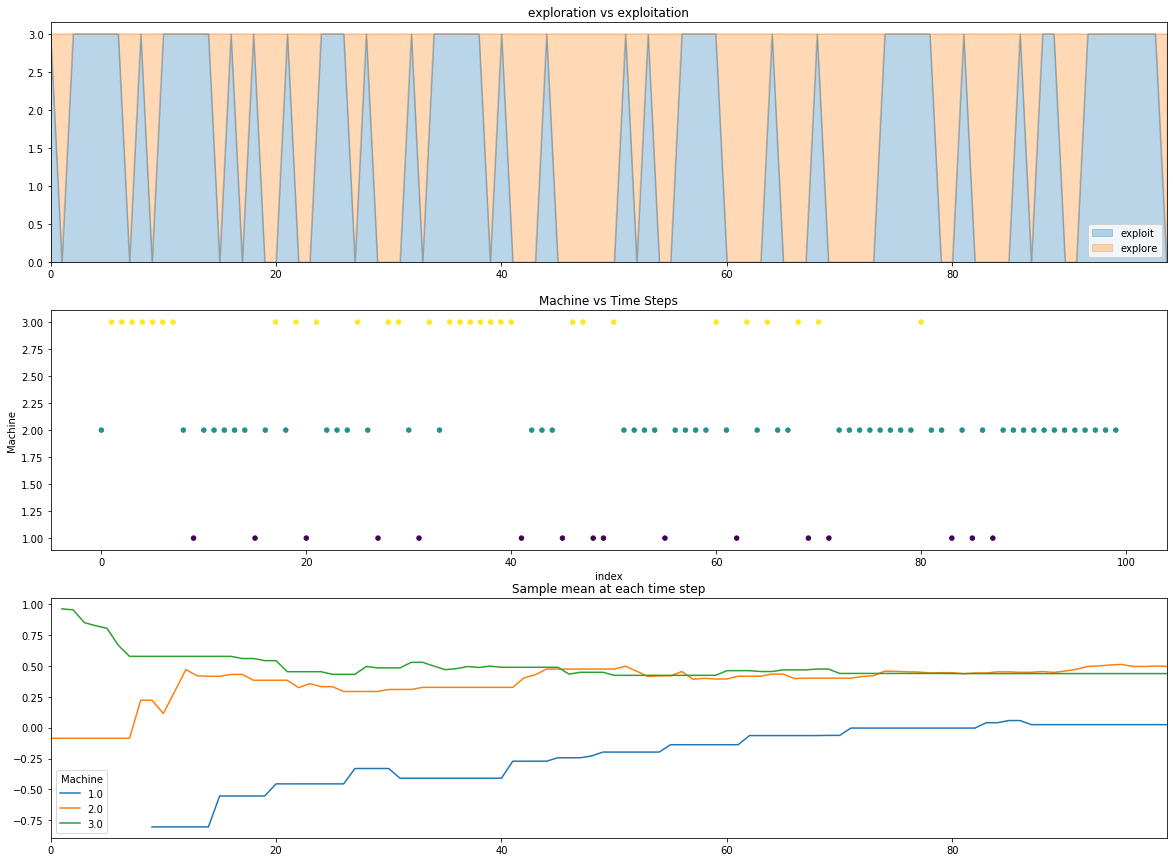

In [165]:

# output["Reward"].plot()
output["exploit"]=0
output["explore"]=0
output.loc[output["Mode"]=="exploit","exploit"]=3
output.loc[output["Mode"]=="explore","explore"]=3
# output[["exploit"]].plot(kind='area',alpha=0.3)
fig, ax = plt.subplots(3,figsize=(20,15))
output[["exploit","explore"]].plot(kind='area',alpha=0.3,ax=ax[0],title="exploration vs exploitation")
output.reset_index().plot.scatter(x="index",y="Machine",c="Machine",colormap='viridis',title="Machine vs Time Steps",colorbar=False,ax=ax[1])
output.groupby("Machine")["Reward"].expanding().mean().unstack().T.fillna(method='ffill').plot(title="Sample mean at each time step",ax=ax[2])

In [110]:
#output.Machine.value_counts()#.plot(kind='bar')

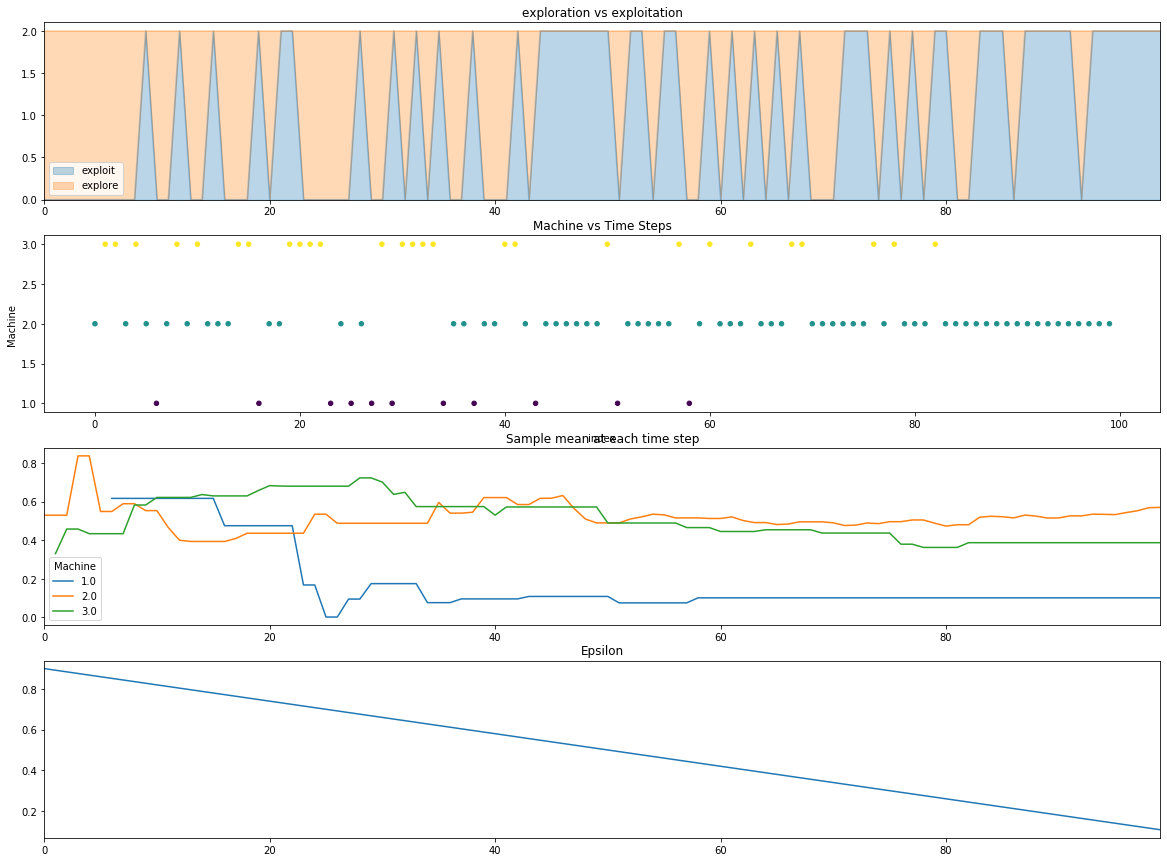

In [167]:
trials = 100
eps_max=0.9
eps_min=0.1
eps_step = (eps_max-eps_min)/trials

epsilon = eps_max


games = 10
machine_sample1=[]
machine_sample2=[]
machine_sample3=[]
for game in range(games):
    rand_num = np.random.random()
    if rand_num<0.33:
        machine_sample1.append(np.random.choice(machine1))
    elif rand_num<0.67:
        machine_sample2.append(np.random.choice(machine2))
    else:
        machine_sample3.append(np.random.choice(machine3))
pd.DataFrame({"machine_sample1":machine_sample1})
output=pd.DataFrame()
for i in range(trials):
    random_num=np.random.random()
    if random_num<epsilon:
        mode="explore"
        output.loc[i,"Mode"]=mode
        choice = np.random.choice([1,2,3])
        output.loc[i,"Machine"] = choice
        
    else:
        machine_selection = np.argmax([np.mean(machine_sample1),\
                                      np.mean(machine_sample2),\
                                      np.mean(machine_sample3)])+1
        output.loc[i,"Mode"]="exploit"
        output.loc[i,"Machine"]=machine_selection
        choice=machine_selection
        
        
    if choice==1:
        reward = np.random.choice(machine1)
        machine_sample1.append(reward)
    if choice==2:
        reward = np.random.choice(machine2)
        machine_sample2.append(reward)
    if choice==3:
        reward = np.random.choice(machine3)
        machine_sample3.append(reward)
    output.loc[i,"Reward"] = reward
    output.loc[i,"epsilon"]=epsilon
    epsilon = max(epsilon-eps_step,eps_min)

# output["Reward"].plot()
output["exploit"]=0
output["explore"]=0
output.loc[output["Mode"]=="exploit","exploit"]=2
output.loc[output["Mode"]=="explore","explore"]=2
# output[["exploit","explore"]].plot(kind='area',alpha=0.1)
# # output["Reward"].plot()        
# output.reset_index().plot.scatter(x="index",y="Machine",c="Machine",colormap='viridis',title="Machine vs Time Steps")
fig, ax = plt.subplots(4,figsize=(20,15))
output[["exploit","explore"]].plot(kind='area',alpha=0.3,ax=ax[0],title="exploration vs exploitation")
output.reset_index().plot.scatter(x="index",y="Machine",c="Machine",colormap='viridis',title="Machine vs Time Steps",colorbar=False,ax=ax[1])
output.groupby("Machine")["Reward"].expanding().mean().unstack().T.fillna(method='ffill').plot(title="Sample mean at each time step",ax=ax[2])
output["epsilon"].plot(title="Epsilon" ,ax=ax[3])

In [37]:
output.Machine.value_counts()

2.0    68
3.0    16
1.0    16
Name: Machine, dtype: int64

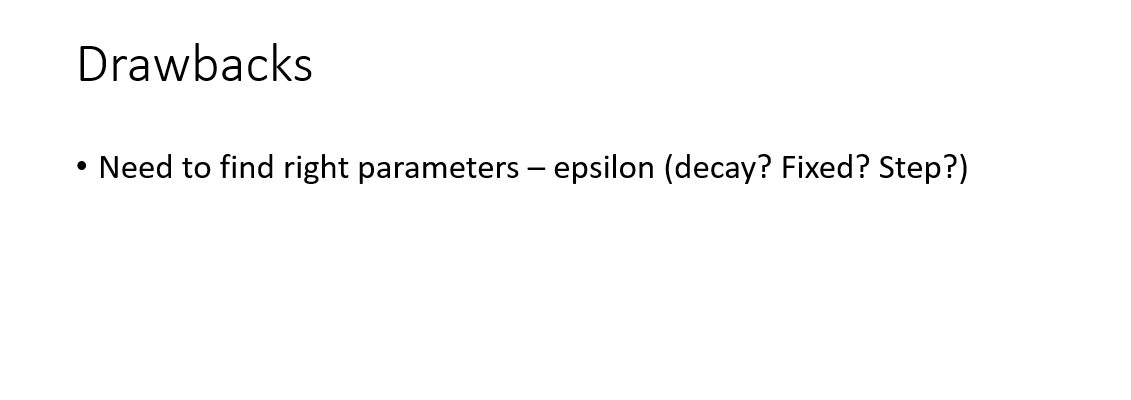

## Approach 2: Upper Confidence Bound
    

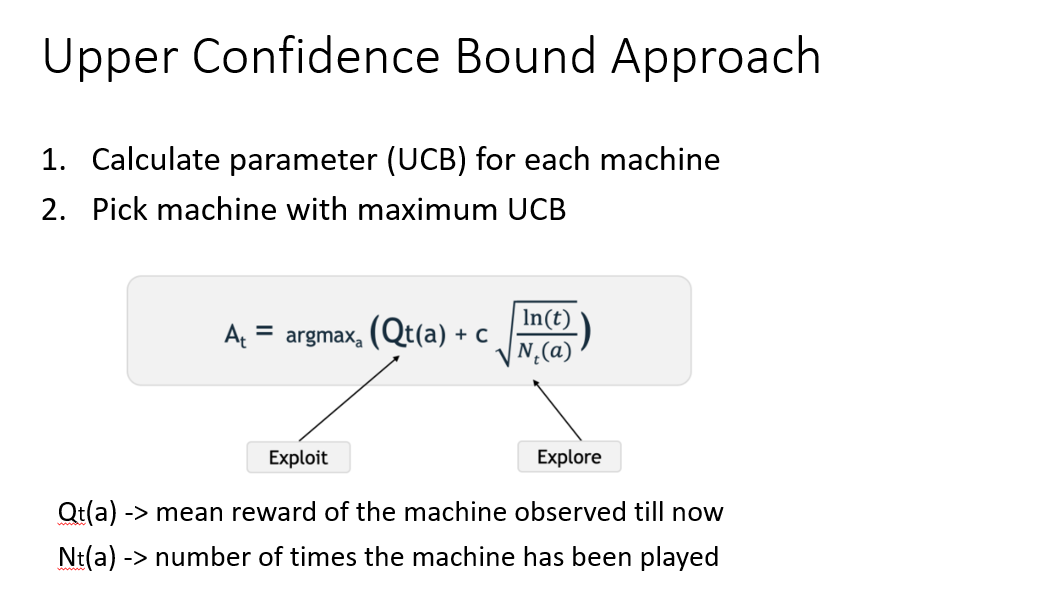

In [168]:
games = 10
machine_sample1=[]
machine_sample2=[]
machine_sample3=[]
for game in range(games):
    rand_num = np.random.random()
    if rand_num<0.33:
        machine_sample1.append(np.random.choice(machine1))
    elif rand_num<0.67:
        machine_sample2.append(np.random.choice(machine2))
    else:
        machine_sample3.append(np.random.choice(machine3))

In [169]:
pd.DataFrame({"machine_sample1":machine_sample1})

,machine_sample1
0,0.090731


In [170]:
pd.DataFrame({"machine_sample2":machine_sample2})

,machine_sample2
0,0.790425
1,2.328548
2,-0.412806
3,0.107184
4,0.594425
5,0.638402


In [171]:
pd.DataFrame({"machine_sample3":machine_sample3})

,machine_sample3
0,0.550202
1,0.547173
2,0.250991


In [172]:
trial = 10
base1 = alt.Chart(pd.DataFrame({"machine_sample1":machine_sample1}))
points1 = base1.mark_point().encode(x=alt.X("machine_sample1",scale=alt.Scale(
            domain=(-2, 2),
            clamp=True
        ))).properties(
    width=500
)

dist1 = base1.transform_density(
    'machine_sample1',
    as_=['machine_sample1', 'density'],
).mark_area().encode(
    x=alt.X("machine_sample1:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=500,height=150)
C = 1.4142

q1_ucb = np.mean(machine_sample1) + C* np.sqrt(np.log(trial)/len(machine_sample1))
q1_lcb = np.mean(machine_sample1) - C* np.sqrt(np.log(trial)/len(machine_sample1))

q1_ucb_plot = alt.Chart(pd.DataFrame({'x': [q1_ucb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)
q1_lcb_plot = alt.Chart(pd.DataFrame({'x': [q1_lcb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)



base2 = alt.Chart(pd.DataFrame({"machine_sample2":machine_sample2}))
points2 = base2.mark_point().encode(x=alt.X("machine_sample2",scale=alt.Scale(
            domain=(-2, 2),
            clamp=True
        ))).properties(
    width=500
)

dist2 = base2.transform_density(
    'machine_sample2',
    as_=['machine_sample2', 'density'],
).mark_area().encode(
    x=alt.X("machine_sample2:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=500,height=150)
C = 1.4142

q2_ucb = np.mean(machine_sample2) + C* np.sqrt(np.log(trial)/len(machine_sample2))
q2_lcb = np.mean(machine_sample2) - C* np.sqrt(np.log(trial)/len(machine_sample2))

q2_ucb_plot = alt.Chart(pd.DataFrame({'x': [q2_ucb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)
q2_lcb_plot = alt.Chart(pd.DataFrame({'x': [q2_lcb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)

base3 = alt.Chart(pd.DataFrame({"machine_sample3":machine_sample3}))
points3 = base3.mark_point().encode(x=alt.X("machine_sample3",scale=alt.Scale(
            domain=(-2, 2),
            clamp=True
        ))).properties(
    width=500
)

dist3 = base3.transform_density(
    'machine_sample3',
    as_=['machine_sample3', 'density'],
).mark_area().encode(
    x=alt.X("machine_sample3:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=500,height=150)
C = 1.4142

q3_ucb = np.mean(machine_sample3) + C* np.sqrt(np.log(trial)/len(machine_sample3))
q3_lcb = np.mean(machine_sample3) - C* np.sqrt(np.log(trial)/len(machine_sample3))

q3_ucb_plot = alt.Chart(pd.DataFrame({'x': [q3_ucb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)
q3_lcb_plot = alt.Chart(pd.DataFrame({'x': [q3_lcb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)





# (dist1+q1_ucb_plot+q1_lcb_plot)&(points1+q1_ucb_plot+q1_lcb_plot)&\
# (dist2+q2_ucb_plot+q2_lcb_plot)&(points2+q2_ucb_plot+q2_lcb_plot)&\
# (dist3+q3_ucb_plot+q3_lcb_plot)&(points3+q3_ucb_plot+q3_lcb_plot)
(points1+q1_ucb_plot+q1_lcb_plot)&\
(points2+q2_ucb_plot+q2_lcb_plot)&\
(points3+q3_ucb_plot+q3_lcb_plot)

alt.VConcatChart(...)

In [173]:
trials = 100
output=pd.DataFrame()

for i in range(trials):
    trial+=1   
    q1_ucb = np.mean(machine_sample1) + C* np.sqrt(np.log(trial)/len(machine_sample1))
    q2_ucb = np.mean(machine_sample2) + C* np.sqrt(np.log(trial)/len(machine_sample2))
    q3_ucb = np.mean(machine_sample3) + C* np.sqrt(np.log(trial)/len(machine_sample3))
    choice = np.argmax([q1_ucb,q2_ucb,q3_ucb])+1
    if choice==1:
        reward = np.random.choice(machine1)
        machine_sample1.append(reward)
    if choice==2:
        reward = np.random.choice(machine2)
        machine_sample2.append(reward)
    if choice==3:
        reward = np.random.choice(machine3)
        machine_sample3.append(reward)
    output.loc[i,"Machine"] = choice
    output.loc[i,"Reward"] = reward
    
    

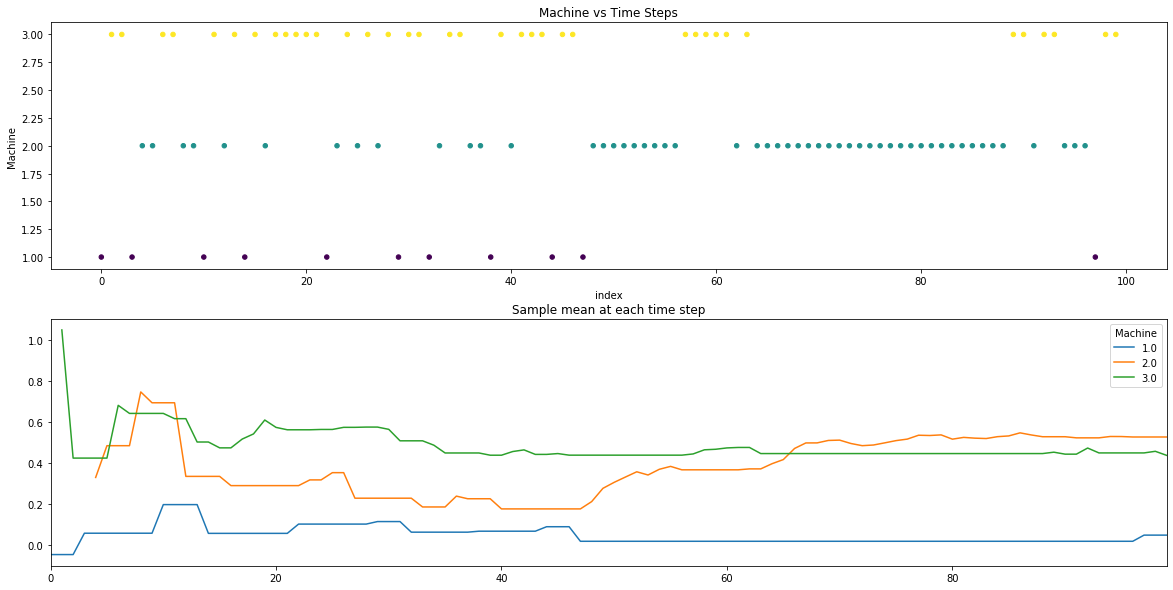

In [174]:
fig, ax = plt.subplots(2,figsize=(20,10))
output.reset_index().plot.scatter(x="index",y="Machine",c="Machine",colormap='viridis',title="Machine vs Time Steps",colorbar=False,ax=ax[0])
output.groupby("Machine")["Reward"].expanding().mean().unstack().T.fillna(method='ffill').plot(title="Sample mean at each time step",ax=ax[1])

In [89]:
output.Machine.value_counts()

2.0    46
3.0    31
1.0    23
Name: Machine, dtype: int64

In [175]:
base1 = alt.Chart(pd.DataFrame({"machine_sample1":machine_sample1}))
points1 = base1.mark_point().encode(x=alt.X("machine_sample1",scale=alt.Scale(
            domain=(-2, 2),
            clamp=True
        ))).properties(
    width=500
)

dist1 = base1.transform_density(
    'machine_sample1',
    as_=['machine_sample1', 'density'],
).mark_area().encode(
    x=alt.X("machine_sample1:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=500,height=150)
C = 1.4142

q1_ucb = np.mean(machine_sample1) + C* np.sqrt(np.log(trial)/len(machine_sample1))
q1_lcb = np.mean(machine_sample1) - C* np.sqrt(np.log(trial)/len(machine_sample1))

q1_ucb_plot = alt.Chart(pd.DataFrame({'x': [q1_ucb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)
q1_lcb_plot = alt.Chart(pd.DataFrame({'x': [q1_lcb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)



base2 = alt.Chart(pd.DataFrame({"machine_sample2":machine_sample2}))
points2 = base2.mark_point().encode(x=alt.X("machine_sample2",scale=alt.Scale(
            domain=(-2, 2),
            clamp=True
        ))).properties(
    width=500
)

dist2 = base2.transform_density(
    'machine_sample2',
    as_=['machine_sample2', 'density'],
).mark_area().encode(
    x=alt.X("machine_sample2:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=500,height=150)
C = 1.4142

q2_ucb = np.mean(machine_sample2) + C* np.sqrt(np.log(trial)/len(machine_sample2))
q2_lcb = np.mean(machine_sample2) - C* np.sqrt(np.log(trial)/len(machine_sample2))

q2_ucb_plot = alt.Chart(pd.DataFrame({'x': [q2_ucb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)
q2_lcb_plot = alt.Chart(pd.DataFrame({'x': [q2_lcb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)

base3 = alt.Chart(pd.DataFrame({"machine_sample3":machine_sample3}))
points3 = base3.mark_point().encode(x=alt.X("machine_sample3",scale=alt.Scale(
            domain=(-2, 2),
            clamp=True
        ))).properties(
    width=500
)

dist3 = base3.transform_density(
    'machine_sample3',
    as_=['machine_sample3', 'density'],
).mark_area().encode(
    x=alt.X("machine_sample3:Q",scale=alt.Scale(domain=(-2,2))),
    y='density:Q',
).properties(width=500,height=150)
C = 1.4142

q3_ucb = np.mean(machine_sample3) + C* np.sqrt(np.log(trial)/len(machine_sample3))
q3_lcb = np.mean(machine_sample3) - C* np.sqrt(np.log(trial)/len(machine_sample3))

q3_ucb_plot = alt.Chart(pd.DataFrame({'x': [q3_ucb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)
q3_lcb_plot = alt.Chart(pd.DataFrame({'x': [q3_lcb]})).mark_rule(color='red').encode(
    x='x',
    size=alt.value(1)
)





# (dist1+q1_ucb_plot+q1_lcb_plot)&(points1+q1_ucb_plot+q1_lcb_plot)&\
# (dist2+q2_ucb_plot+q2_lcb_plot)&(points2+q2_ucb_plot+q2_lcb_plot)&\
# (dist3+q3_ucb_plot+q3_lcb_plot)&(points3+q3_ucb_plot+q3_lcb_plot)
(points1+q1_ucb_plot+q1_lcb_plot)&\
(points2+q2_ucb_plot+q2_lcb_plot)&\
(points3+q3_ucb_plot+q3_lcb_plot)

alt.VConcatChart(...)

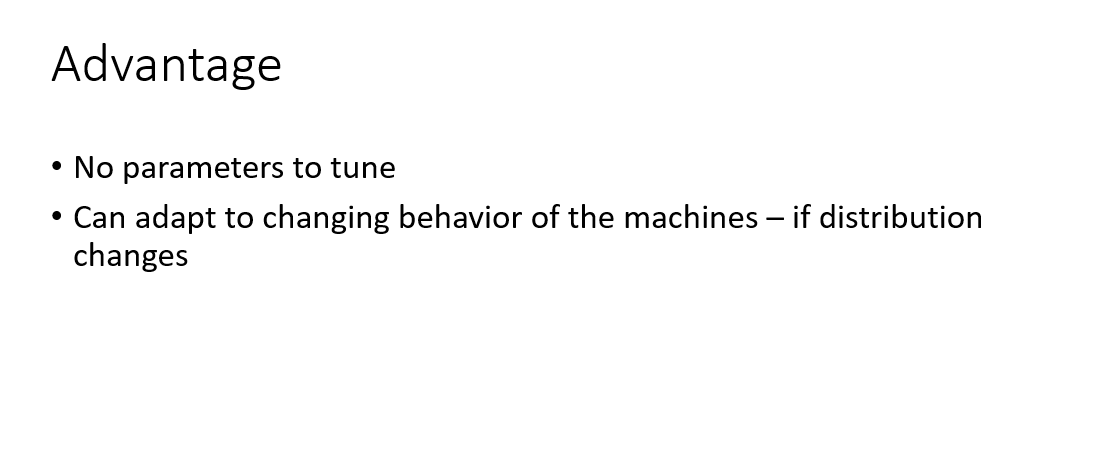

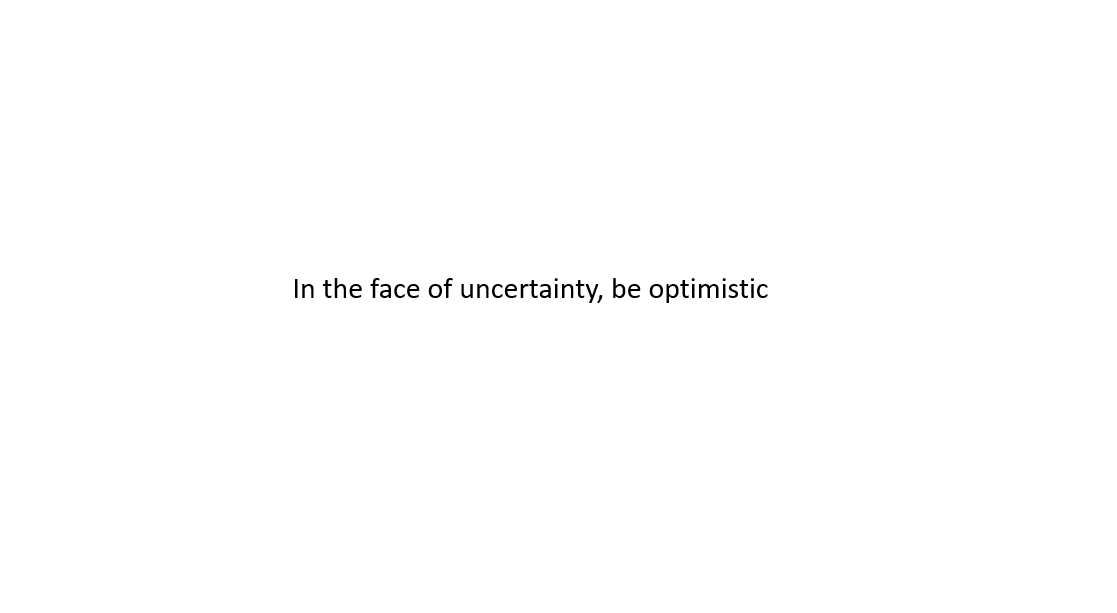

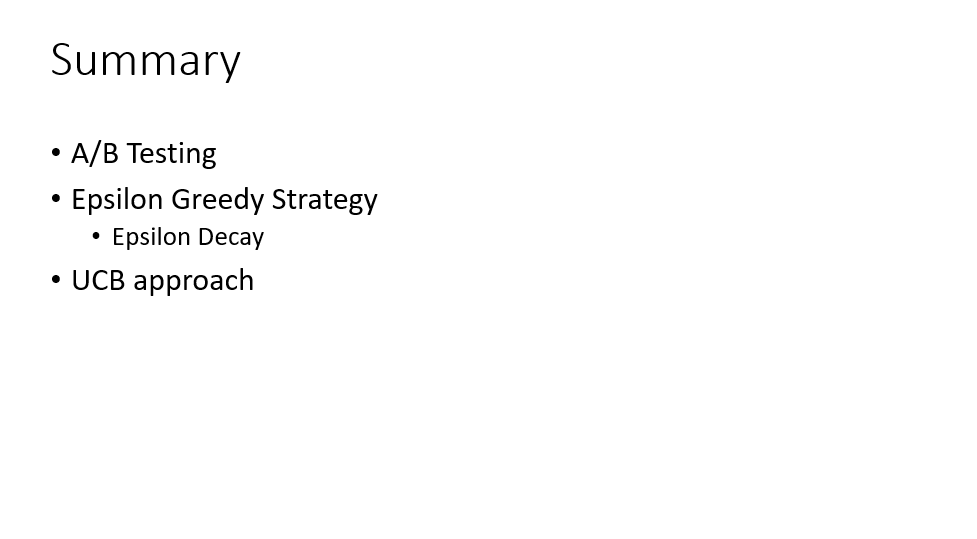